# Reading data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

# load the data
data_dir = os.getcwd() + '\\data\\'

### CO2 Level Sensor

In [2]:
# reading CO2 data
raw_co2 = pd.read_csv(data_dir + 'CO2 Level.csv')
raw_co2.describe()

,value
count,11446.000000
mean,770.676393
std,288.684136
min,372.000000
25%,521.000000
50%,671.500000
75%,952.000000
max,1410.000000


### Motion Sensor

In [11]:
# reading motion data
raw_mot = pd.read_csv(data_dir + 'Motion Data.csv')
raw_mot.describe()

,value
count,11448.000000
mean,0.183526
std,0.387114
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Distance Sensor

In [4]:
# reading distance data
raw_dist = pd.read_csv(data_dir + 'Distance Sensor.csv')
raw_dist.describe()

,value
count,11448.000000
mean,9.713074
std,24.923468
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,99.879311


# Preprocessing

## CO2 Level Data

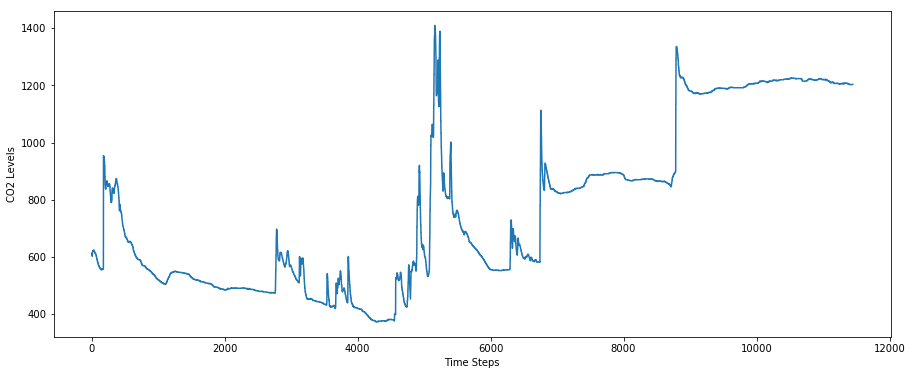

In [5]:
plt.figure(figsize=(15,6))
plt.plot(raw_co2.value)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

### Missing Data
We have 11,448 observation in Distance and Motion dataset, but in CO2 Level Sensor's data we have 11,446 obesrvations. Therefore, we have 2 missing data. Assuming the missing data are located at the end of dataset and considering the constant values at the above chart (approximately constant at the end), we add 2 more observation to the data.  

In [6]:
# adding 2 rows to CO2 Level observation 
missing_time = raw_co2.loc[11445][0]
missing_value = raw_co2.loc[11445][1]
raw_co2.loc[11446] = [missing_time, missing_value]
raw_co2.loc[11447] = [missing_time, missing_value]
raw_co2[-3:]

## Motion Data

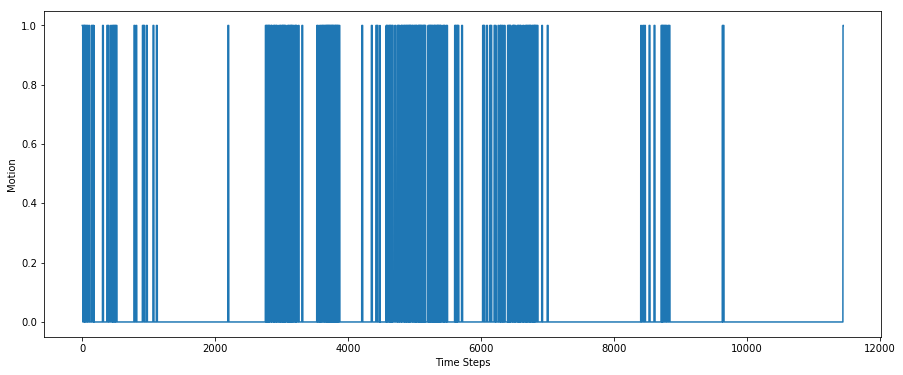

In [7]:
plt.figure(figsize=(15,6))
plt.plot(raw_mot.value)
plt.xlabel('Time Steps')
plt.ylabel('Motion')
plt.show()

In [12]:
raw_mot.value.unique()

array([1, 0], dtype=int64)

Regarding to the values of the Motion Sensor's dataset, the data is binary pulses in each time step which represent if the sensor detects any motion or not. 

## Distance Data

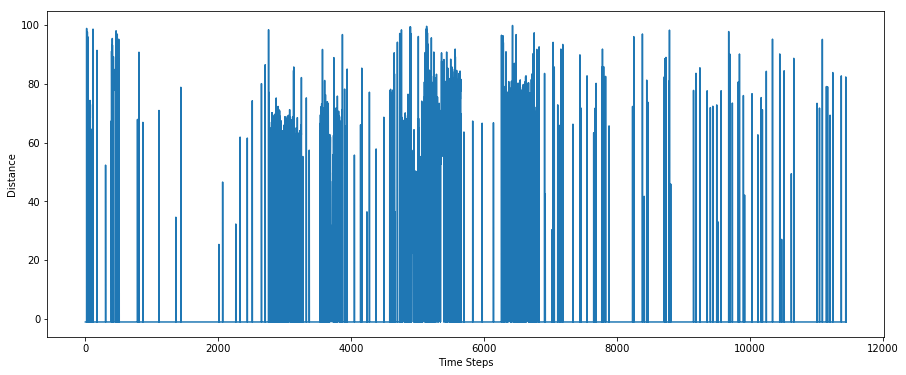

In [14]:
plt.figure(figsize=(15,6))
plt.plot(raw_dist.value)
plt.xlabel('Time Steps')
plt.ylabel('Distance')
plt.show()

According to the chart, we can conclude that the Distance data has many -1 values which could be explained as invalid data or non-occupany. 

Removing the -1 values from the data will result the chart below:

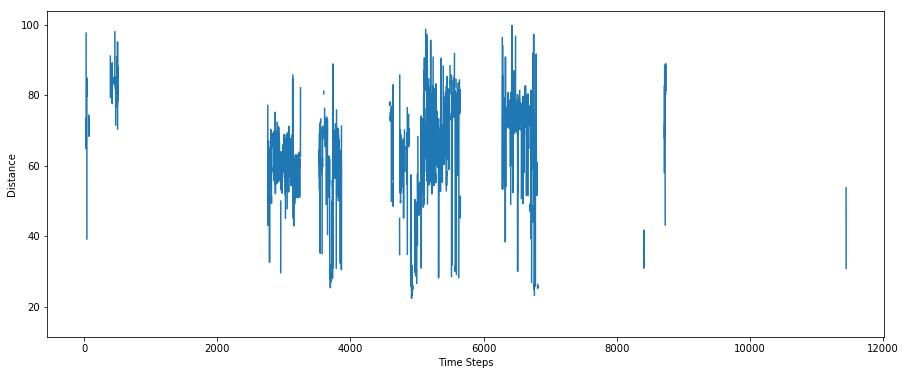

In [18]:
plt.figure(figsize=(15,6))
plt.plot(raw_dist.value.replace(-1,np.NaN))
plt.xlabel('Time Steps')
plt.ylabel('Distance')
plt.show()

# Data Cleansing and Feature
### Normalization
As we know, our datasets are included in different scale measurments. Therefore, we need to normalizde our datasets with commonly used methods in range 0 to 1.
For these purpose, we use common different methods to normalize for future usage.

- Min-Max Normalization
- Standard Deviation Normalization
- 


A simple approach for data cleansing is to replace all positive values with 1 and 0 for the -1.

# Visualization

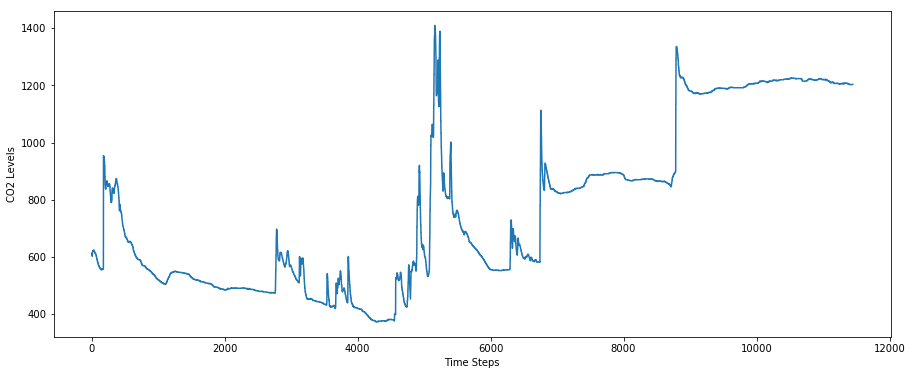

In [5]:
plt.figure(figsize=(15,6))
plt.plot(co2)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

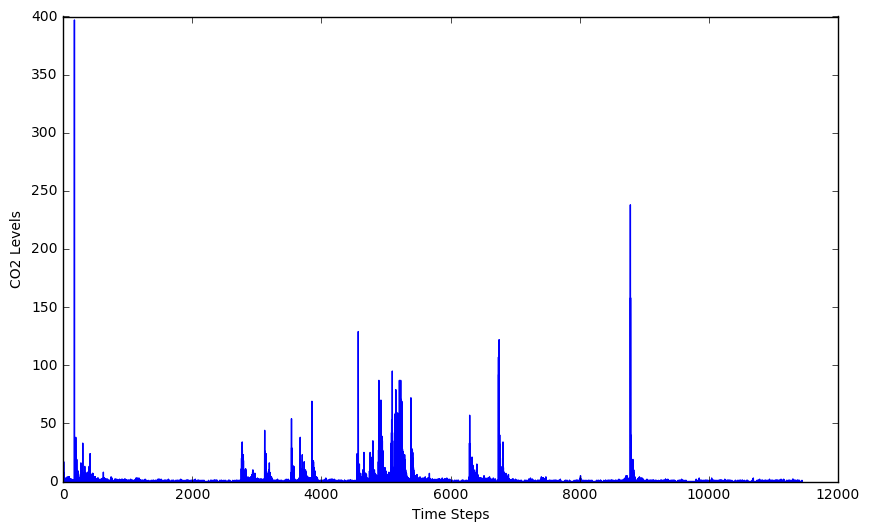

In [49]:
def dif(x,y):
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dy
y = co2.astype(np.float64)
d = np.abs(dif(np.arange(11446), y))

plt.figure(figsize=(10,6))
plt.plot(d)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

In [64]:
def dif10(x,y):
    dy = np.zeros(y.shape,np.float)
    dy[0:-10] = np.diff(y)/np.diff(x)
    dy[-10] = (y[-10] - y[-20])/(x[-10] - x[-20])
    return dy
y = co2.astype(np.float64)
d10 = np.abs(dif10(np.arange(11446), y))

plt.figure(figsize=(10,6))
plt.plot(d10)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

ValueError: could not broadcast input array from shape (11445) into shape (11436)

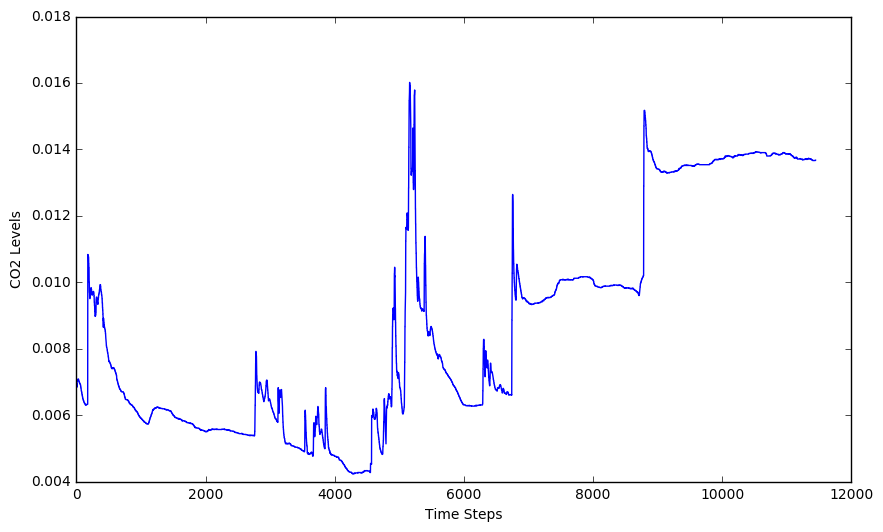

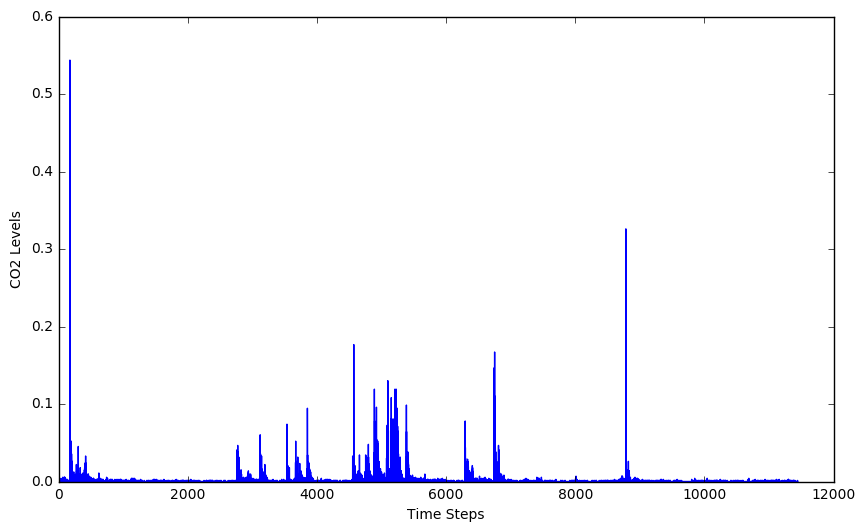

In [59]:
normy = y / np.linalg.norm(y)
plt.figure(figsize=(10,6))
plt.plot(normy)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

normd = d / np.linalg.norm(d)
plt.figure(figsize=(10,6))
plt.plot(normd)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()